# Time Value of Money

This contains Python code to calculate 

1. Present Value given Future Value

2. Future Value given Present Value

3. Net Present Value

4. Internal Rate of Return

5. Amortization

In [121]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

PRESENT VALUE

In [77]:
r=0.05

In [78]:
#50000 is the future value. What is the present value??
cashflows = np.ones(20) * 50000
x = cashflows.size
for year in range(x):
    cashflows[year] = round(cashflows[year] / (1+r ) ** year, 2)
cashflows

array([50000.  , 47619.05, 45351.47, 43191.88, 41135.12, 39176.31,
       37310.77, 35534.07, 33841.97, 32230.45, 30695.66, 29233.96,
       27841.87, 26516.07, 25253.4 , 24050.85, 22905.58, 21814.83,
       20776.03, 19786.7 ])

In [79]:
print("Sum of cashflows is ${:.2f}".format(sum(cashflows)))

Sum of cashflows is $654266.04


Text(0.5, 1.0, 'Trends of Present Value of money across Years')

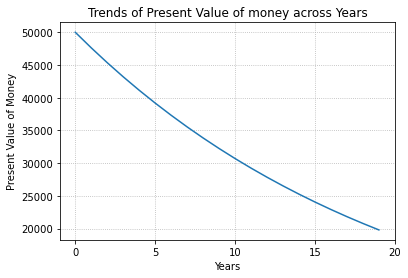

In [80]:
plt.plot(cashflows)
plt.grid(linestyle=':')
plt.xticks([0,5,10,15,20])
plt.xlabel('Years')
plt.ylabel('Present Value of Money')
plt.title('Trends of Present Value of money across Years')

FUTURE VALUE

In [81]:
#50000 is the present value. What is the future value??
balance = np.ones(20) * 50000
x = balance.size
for year in range(x):
    balance[year] = round(balance[year] * (1+r ) ** year, 2)
balance

array([ 50000.  ,  52500.  ,  55125.  ,  57881.25,  60775.31,  63814.08,
        67004.78,  70355.02,  73872.77,  77566.41,  81444.73,  85516.97,
        89792.82,  94282.46,  98996.58, 103946.41, 109143.73, 114600.92,
       120330.96, 126347.51])

In [82]:
print("Sum of balances is ${:.2f}".format(sum(balance)))

Sum of balances is $1653297.71


Text(0.5, 1.0, 'Trends of Future Value of money across Years')

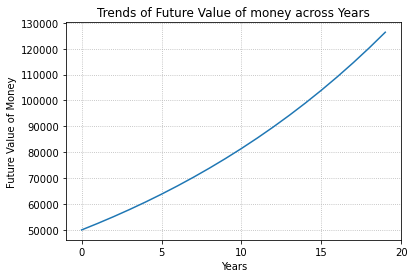

In [83]:
plt.plot(balance)
plt.grid(linestyle=':')
plt.xticks([0,5,10,15,20])
plt.xlabel('Years')
plt.ylabel('Future Value of Money')
plt.title('Trends of Future Value of money across Years')

In [93]:
#IDEA - Stock Market Fluctations
#Assume a normal distribution with a given mean and SD as the rate of return
ending_balance = np.ones(20) * 50000
for year in range(1,len(ending_balance)):
    r = float(np.random.normal(0.95, 0.185))
    ending_balance[year] = round(ending_balance[year-1] * (1+r))
ending_balance

array([5.00000000e+04, 8.62760000e+04, 1.69614000e+05, 3.34211000e+05,
       4.88368000e+05, 9.64415000e+05, 1.84684100e+06, 3.65233800e+06,
       6.42137700e+06, 1.13852820e+07, 2.45585030e+07, 4.31053670e+07,
       9.52756430e+07, 1.67004305e+08, 3.17459851e+08, 6.88940452e+08,
       1.39624871e+09, 2.43046913e+09, 4.05584242e+09, 6.98966387e+09])

In [94]:
print("Sum of balances is ${:.2f}".format(sum(ending_balance)))

Sum of balances is $16233966972.00


Text(0.5, 1.0, 'Ending balances across Years')

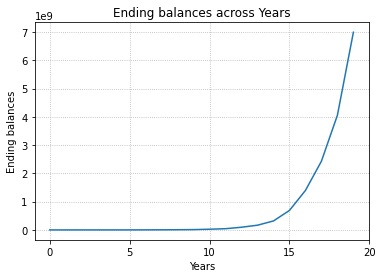

In [95]:
plt.plot(ending_balance)
plt.grid(linestyle=':')
plt.xticks([0,5,10,15,20])
plt.xlabel('Years')
plt.ylabel('Ending balances')
plt.title('Ending balances across Years')

In [108]:
r = .05
T = 1
pv = 50000
npf.fv(r, T, 0, -pv, when='begin')

52500.0

In [109]:
npf.fv(r, T, 0, -pv, when='end')

52500.0

In [110]:
npf.fv(r, T, -500, -pv, when='begin')

53025.0

In [102]:
npf.fv(r, T, -500, -pv, when='end')

53025.0

NET PRESENT VALUE

In [111]:
initial_investment = 100000
cost_of_capital = 0.12
years = np.arange(1,6)
cashflows = np.ones(5) * 30000

In [112]:
discounted_cashflows = cashflows / (1 + cost_of_capital) ** years
discounted_cashflows

array([26785.71428571, 23915.81632653, 21353.4074344 , 19065.54235214,
       17022.80567156])

In [113]:
npf = sum(discounted_cashflows) - initial_investment
npf

8143.286070350136

INTERNAL RATE OF RETURN

In [124]:
initial_investment = 100000
cost_of_capital = 0.12
years = np.arange(1,6)
cashflows = np.ones(5) * 30000

In [125]:
discounted_cashflows = cashflows / (1 + cost_of_capital) ** years
discounted_cashflows

array([26785.71428571, 23915.81632653, 21353.4074344 , 19065.54235214,
       17022.80567156])

In [126]:
#Returns cost of capital that makes NPV 0
irr_cashflows = [-100000, 30000,30000,30000,30000,30000]
cost_of_capital = npf.irr(irr_cashflows)
cost_of_capital

0.1523823711663066

In [128]:
#Reverse of last code
discounted_cashflows = cashflows / (1 + cost_of_capital) ** years
initial_investment - sum(discounted_cashflows) #Pretty close to zero

1.4551915228366852e-11

AMORTIZATION

In [130]:
#Loan Example - Payment for 30 years
pv = 360000    #Principal Value
rate = 0.05875 #Rate of Interest
term = 30      # Time period in years. Convert it to months
pmt = npf.pmt(rate / 12, term * 12, -pv)  #Monthly installment
pmt

2129.535947424394

In [133]:
#Amortization over a time period
amort_table = pd.DataFrame({'Balance': np.zeros(term * 12 + 1), 
                            'Interest': np.zeros(term * 12 + 1),
                            'Principal': np.zeros(term * 12 + 1),
                            'Cum_Int' : np.zeros(term * 12 + 1)})

In [134]:
amort_table['Balance'][0] = pv
amort_table['Interest'][0] = amort_table['Balance'][0]*(rate/12)
amort_table['Principal'][0] = pmt - amort_table['Interest'][0]
amort_table['Cum_Int'][0] = amort_table['Interest'][0].cumsum()

In [135]:
amort_table.head()

,Balance,Interest,Principal,Cum_Int
0,360000.0,1762.5,367.035947,1762.5
1,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0


In [136]:
for payment in range(1,360):
    amort_table['Balance'][payment] = amort_table['Balance'][payment-1] - amort_table['Principal'][payment-1]
    amort_table['Interest'][payment] = amort_table['Balance'][payment]*(rate/12)
    amort_table['Principal'][payment] = pmt - amort_table['Interest'][payment]
amort_table['Cum_Int'] = amort_table['Interest'].cumsum()
amort_table = round(amort_table,2)

In [137]:
amort_table.head()

,Balance,Interest,Principal,Cum_Int
0,360000.00,1762.50,367.04,1762.50
1,359632.96,1760.70,368.83,3523.20
2,359264.13,1758.90,370.64,5282.10
3,358893.49,1757.08,372.45,7039.18
4,358521.04,1755.26,374.28,8794.44


In [138]:
amort_table.tail()

,Balance,Interest,Principal,Cum_Int
356,8414.90,41.20,2088.34,406570.89
357,6326.56,30.97,2098.56,406601.87
358,4228.00,20.70,2108.84,406622.57
359,2119.16,10.38,2119.16,406632.94
360,0.00,0.00,0.00,406632.94


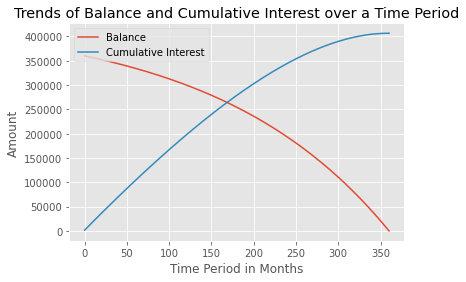

In [145]:
#Plot
with plt.style.context('ggplot'):
    plt.plot(amort_table['Balance'], label='Balance')
    plt.plot(amort_table['Cum_Int'], label = 'Cumulative Interest')
    plt.title('Trends of Balance and Cumulative Interest over a Time Period')
    plt.xlabel('Time Period in Months')
    plt.ylabel('Amount')
    plt.legend(loc=2)